In [282]:
setwd("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/")
#setwd("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/crisprTE/")

In [344]:
mismatch=3
sgRNA="gRNA-L1HS_us"
#sgRNA="gRNA-L1PA2-4_us"
#sgRNA="gRNA-L1HS_crispriTE"
#inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/crisprTE/gRNA-L1HS-crisprTEcombine.count",mismatch,".result",sep="")
#sgRNA="gRNA-L1PA2_crispriTE"
#inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/crisprTE/gRNA-L1PA2-crisprTEcombine.count",mismatch,".result",sep="")
#sgRNA="gRNA-L1PA3_crispriTE"
#inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/crisprTE/gRNA-L1PA3-crisprTEcombine.count",mismatch,".result",sep="")
#sgRNA="gRNA-L1PA4_crispriTE"
#inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/crisprTE/gRNA-L1PA4-crisprTEcombine.count",mismatch,".result",sep="")
inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/gRNA-L1HScombine.count",mismatch,".result",sep="")
#inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/gRNA-L1PA2-4combine.count",mismatch,".result",sep="")
#inputfile<-"/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/crisprTE/gRNA-test-batch-L1HScombine.count0.result"
data<-read.table(inputfile)

In [345]:
# mismatch=3
# sgRNA="gRNA-L1PA2-4_"
# inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/gRNA-L1PA2-4combine.count",mismatch,".result",sep="")
# data<-read.table(inputfile)

png 
  2

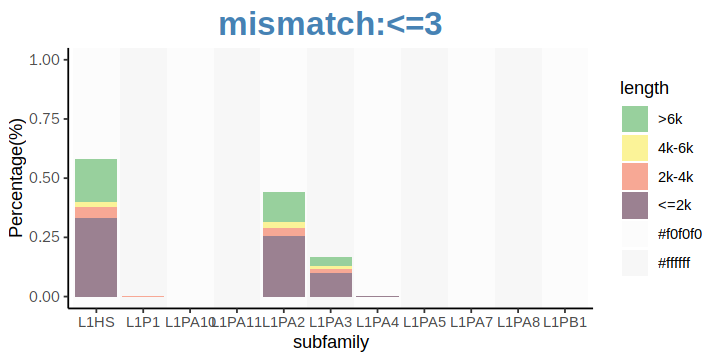

In [346]:
library(dplyr)
library(tidyr)
data_ext2<-data %>% separate(V1, c("family","subfamily","length"),sep = "[:]")
data_ext2$class<-paste(data_ext2$family,data_ext2$subfamily,sep=":")
metadata<-read.table("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/TE.total.num.txt")
colnames(metadata)[1]<-"class"
mergeDat2<-merge(data_ext2,metadata,by="class")
mergeDat3<-mergeDat2 %>% separate(class, c("family","subfamily"),sep = "[:]")
mergeDat3$per<-mergeDat3$V2.x/mergeDat3$V3
colnames(mergeDat3)<-c("family","subfamily","length","count","label","total","per")
mergeDat3$count<-as.numeric(mergeDat3$count)
mergeDat3$total<-as.numeric(mergeDat3$total)
mergeDat3$per<-as.numeric(mergeDat3$per)
mergeDat3$length<-factor(mergeDat3$length,levels=rev(c("<=2k","2k-4k","4k-6k",">6k")))
background_colors <- c("#f0f0f0", "#ffffff")
unique_categories <- unique(data_ext2$subfamily)
category_positions <- as.numeric(factor(unique_categories))
background_data <- data.frame(
  xmin = category_positions - 0.5,
  xmax = category_positions + 0.5,
  ymin = -Inf,
  ymax = Inf,
  fill = rep(background_colors, length.out = length(unique_categories))
)
#ead(background_data)
library(ggplot2)
options(repr.plot.width =6, repr.plot.height =3)
title<-paste("mismatch:<=",mismatch,sep="")
p<-ggplot(data=mergeDat3) + 
  geom_rect(data = background_data, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = fill), alpha = 0.2) +
  geom_bar(aes(fill=length, y=per, x=subfamily),position='stack', stat='identity')+
  scale_fill_manual(name = "length",values = c("#98d09d","#fbf398","#f7a895","#9b8191","#f0f0f0","#dadada"))+
  theme_classic()+
  #facet_grid(. ~ sgRNA) +
  scale_y_continuous(limits = c(0, 1))+
  #coord_flip()+
  labs(title=title,y="Percentage(%)")+
  theme(plot.title=element_text(face="bold", #字体
                                color="steelblue", #颜色
                                size=20,  #大小
                                hjust=0.5, #位置
                                vjust=0.5,
                                angle=360))
p
outputfile<-paste(sgRNA,mismatch,".pdf",sep="")
pdf(outputfile,width = 6,height = 3)
p
dev.off()

png 
  2

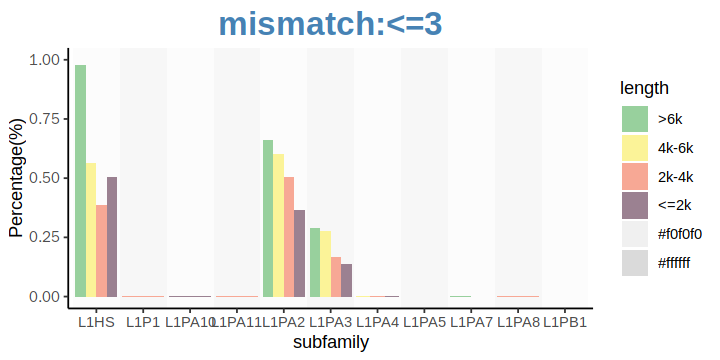

In [347]:
metadata<-read.table("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/TE.total.num.txt")
mergeDat<-merge(data,metadata,by="V1")
library(dplyr)
library(tidyr)
data_ext<-mergeDat %>% separate(V1, c("family","subfamily","length"),sep = "[:]")
colnames(data_ext)[4]<-"count"
colnames(data_ext)[5]<-"label"
colnames(data_ext)[6]<-"total"
#head(data_ext)
data_ext$count<-as.numeric(data_ext$count)
data_ext$total<-as.numeric(data_ext$total)
data_ext$per<-data_ext$count/data_ext$total
data_ext$length<-factor(data_ext$length,levels=rev(c("<=2k","2k-4k","4k-6k",">6k")))
library(ggplot2)
background_colors <- c("#f0f0f0", "#ffffff")
unique_categories <- unique(data_ext$subfamily)
category_positions <- as.numeric(factor(unique_categories))
background_data <- data.frame(
  xmin = category_positions - 0.5,
  xmax = category_positions + 0.5,
  ymin = -Inf,
  ymax = Inf,
  fill = rep(background_colors, length.out = length(unique_categories))
)
#head(background_data)
library(ggplot2)
options(repr.plot.width =6, repr.plot.height =3)
title<-paste("mismatch:<=",mismatch,sep="")
p<-ggplot(data=data_ext) + 
  geom_rect(data = background_data, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = fill), alpha = 0.2) +
  geom_bar(aes(fill=length, y=per, x=subfamily),position='dodge', stat='identity')+
  #scale_fill_brewer(palette = "Paired")+
 # scale_fill_manual(values = c("#17becf","#9467bd","#ff7f0e","#bcbd22"))+
  scale_fill_manual(name = "length",values = c("#98d09d","#fbf398","#f7a895","#9b8191","#f0f0f0","#dadada"))+
  theme_classic()+
  #facet_grid(. ~ sgRNA) +
  scale_y_continuous(limits = c(0, 1))+
  #coord_flip()+
  labs(title=title,y="Percentage(%)")+
  theme(plot.title=element_text(face="bold", #字体
                                color="steelblue", #颜色
                                size=20,  #大小
                                hjust=0.5, #位置
                                vjust=0.5,
                                angle=360))
p <- p + guides(fill = guide_legend(override.aes = list(alpha = 1)))
p
outputfile<-paste(sgRNA,"per_split",mismatch,".pdf",sep="")
pdf(outputfile,width = 6,height = 3)
p
dev.off()